In [2]:
# import required modules

import matplotlib.pyplot as plt
import numpy as np
import pprint, os

# to get "physion" see: https://github.com/yzerlaut/physion
from physion.analysis.read_NWB import Data
from physion.dataviz.show_data import MultimodalData
from physion.assembling.saving import get_files_with_extension

# to get "datavyz" see: https://github.com/yzerlaut/datavyz
from datavyz import graph_env_manuscript as ge

# Dataset

In [5]:
# 
root_datafolder = '/home/yann/DATA/Fani'

FILES = np.sort(get_files_with_extension(root_datafolder, '.nwb', recursive=True))

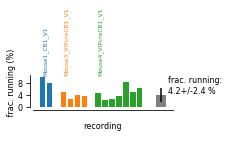

In [8]:
from physion.analysis.behavior import population_analysis
fig, ax = ge.figure(figsize=(1.5,.7), right=5, top=15)
_, ax = population_analysis(FILES, ax=ax)
ge.save_on_desktop(fig, 'fig.png')

# Visualizing raw data

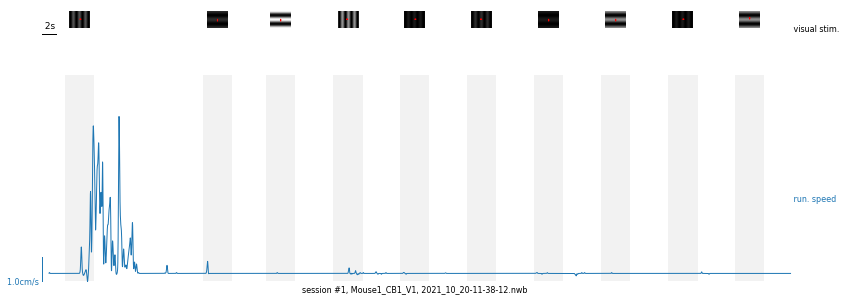

In [12]:
index =0
np.random.seed(10)
data = MultimodalData(FILES[index])
fig, ax = data.plot_raw_data(tlim=[310, 410], 
                  settings={'Locomotion':dict(fig_fraction=2, subsampling=1, color=ge.blue),
                            #'CaImagingRaster':dict(fig_fraction=3, subsampling=1,
                            #                       roiIndices='all',
                            #                       normalization='per-line',
                            #                       quantity='CaImaging', subquantity='Fluorescence'),
                            #'CaImaging':dict(fig_fraction=4, subsampling=1,
                            #                       roiIndices=np.sort(np.random.choice(np.arange(data.iscell.sum()),5, 
                            #                                                   replace=False)),
                            #                       quantity='CaImaging', subquantity='Fluorescence'),
                           'VisualStim':dict(fig_fraction=1)},
                   Tbar=2, figsize=(3.5,6));
ge.annotate(ax, 'session #%i, %s, %s ' % (index+1, data.metadata['subject_ID'], FILES[index].split('/')[-1]),
            (0.5,0), ha='center')
#ge.save_on_desktop(fig, 'fig.png', dpi=300)

# Visually-evoked activity - contrast dependency

X-bar label automatically set to:  0.8  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  0.0  Using the format %.1f  --> adjust it and add units through the format !
X-bar label automatically set to:  0.8  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  0.0  Using the format %.1f  --> adjust it and add units through the format !
X-bar label automatically set to:  0.8  Using the format %.1f  --> adjust it and add units through the format !
Y-bar label automatically set to:  0.0  Using the format %.1f  --> adjust it and add units through the format !


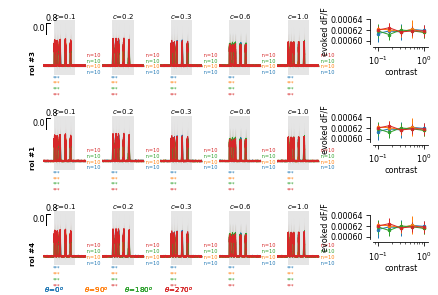

In [58]:
index = 10
FullData = MultimodalData(FILES[index])


CaImaging_options = dict(quantity='Photodiode-Signal') #, 'CaImaging', subquantity='dF/F')

Nexample = 3
fig, AX = ge.figure(axes=(5,Nexample), figsize=(.8,1.2), right=12, 
                    bottom=0.3, top=1.5,
                    reshape_axes=False, wspace=0.6, hspace=1.2)

stat_test_props=dict(interval_pre=[-2,0], interval_post=[1,3],
                     test='ttest', positive=True)

#for n, roiIndex in enumerate(np.random.choice(np.arange(data.iscell.sum()), Nexample)):
for n, roiIndex in enumerate(np.random.choice(np.arange(5), Nexample)):

    EPISODES = EpisodeResponse(FullData,
                               protocol_id=0,
                               prestim_duration=-stat_test_props['interval_pre'][0],
                               roiIndex = roiIndex, verbose=False,
                              **CaImaging_options)

    FullData.plot_trial_average(EPISODES=EPISODES,
                                          protocol_id=0,
                                          roiIndex = roiIndex,
                                          color_key='angle',
                                          column_key='contrast',
                                          #ybar=1., ybarlabel='1dF/F',
                                          #xbar=1., xbarlabel='1s',
                                          fig=fig, AX=[AX[n]], no_set=False,
                                          with_annotation=True,
                                          #fig_preset='raw-traces-preset+right-space',
                                          with_stat_test=True, stat_test_props=stat_test_props,
                                          verbose=False,
                                          **CaImaging_options)

    cell_data = EPISODES.compute_summary_data(stat_test_props,
                                              exclude_keys=['repeats'])
    inset = ge.inset(fig, (.87,1.-(n+.6)/Nexample,0.13,.25/Nexample))
    
    for a, angle in enumerate(EPISODES.varied_parameters['angle']):
        
        angle_cond = cell_data['angle']==angle
        mResp, sResp = [], []
        
        for c, contrast in enumerate(EPISODES.varied_parameters['contrast']):
            
            cond = angle_cond & (cell_data['contrast']==contrast)
            mResp.append(np.mean(cell_data['value'][cond]))
            sResp.append(np.std(cell_data['value'][cond]))
            
        ge.scatter(EPISODES.varied_parameters['contrast'], mResp, sy=sResp, color=ge.tab10(a), 
                   lw=1, ax=inset, no_set=True)
        
    ge.annotate(AX[n][0], 'roi #%i\n' % (roiIndex+1), (0,0), ha='right', rotation=90, size='small', bold=True)
    
    ge.set_plot(inset, xlabel='contrast', xscale='log', ylabel='evoked dF/F')
ge.save_on_desktop(fig, 'fig.png', dpi=300)